**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

**Reading the data**

In [ ]:
road_accidents = pd.read_csv('road-accidents.csv', sep = '|', skiprows=range(0,9))
miles_driven = pd.read_csv('miles-driven.csv', sep = '|')

**Getting overview of "road-accidents.csv"**

In [ ]:
print(road_accidents.columns)
print('Columns description:\n# drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)\n# perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)\n# perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)\n# perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)')

Index(['state', 'drvr_fatl_col_bmiles', 'perc_fatl_speed', 'perc_fatl_alcohol',
       'perc_fatl_1st_time'],
      dtype='object')
Columns description:
# drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)
# perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)
# perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)
# perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)


In [ ]:
road_accidents.shape

(51, 5)

In [ ]:
road_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [ ]:
road_accidents.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


In [ ]:
road_accidents.isnull().sum()

state                   0
drvr_fatl_col_bmiles    0
perc_fatl_speed         0
perc_fatl_alcohol       0
perc_fatl_1st_time      0
dtype: int64

In [ ]:
road_accidents.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [ ]:
road_accidents.tail()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
46,Virginia,12.7,19,27,88
47,Washington,10.6,42,33,86
48,West Virginia,23.8,34,28,87
49,Wisconsin,13.8,36,33,84
50,Wyoming,17.4,42,32,90


**Getting overview of "miles-driven.csv"**

In [ ]:
print(miles_driven.columns)

Index(['state', 'million_miles_annually'], dtype='object')


In [ ]:
miles_driven.shape

(51, 2)

In [ ]:
miles_driven.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   51 non-null     object
 1   million_miles_annually  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [ ]:
miles_driven.describe()

,million_miles_annually
count,51.000000
mean,57851.019608
std,59898.414088
min,3568.000000
25%,17450.000000
50%,46606.000000
75%,71922.500000
max,320784.000000


In [ ]:
miles_driven.isnull().sum()

state                     0
million_miles_annually    0
dtype: int64

In [ ]:
miles_driven.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [ ]:
miles_driven.tail()

,state,million_miles_annually
46,Virginia,80974
47,Washington,56955
48,West Virginia,18963
49,Wisconsin,58554
50,Wyoming,9245


**Graphical Visualization of "road-accidents.csv"**

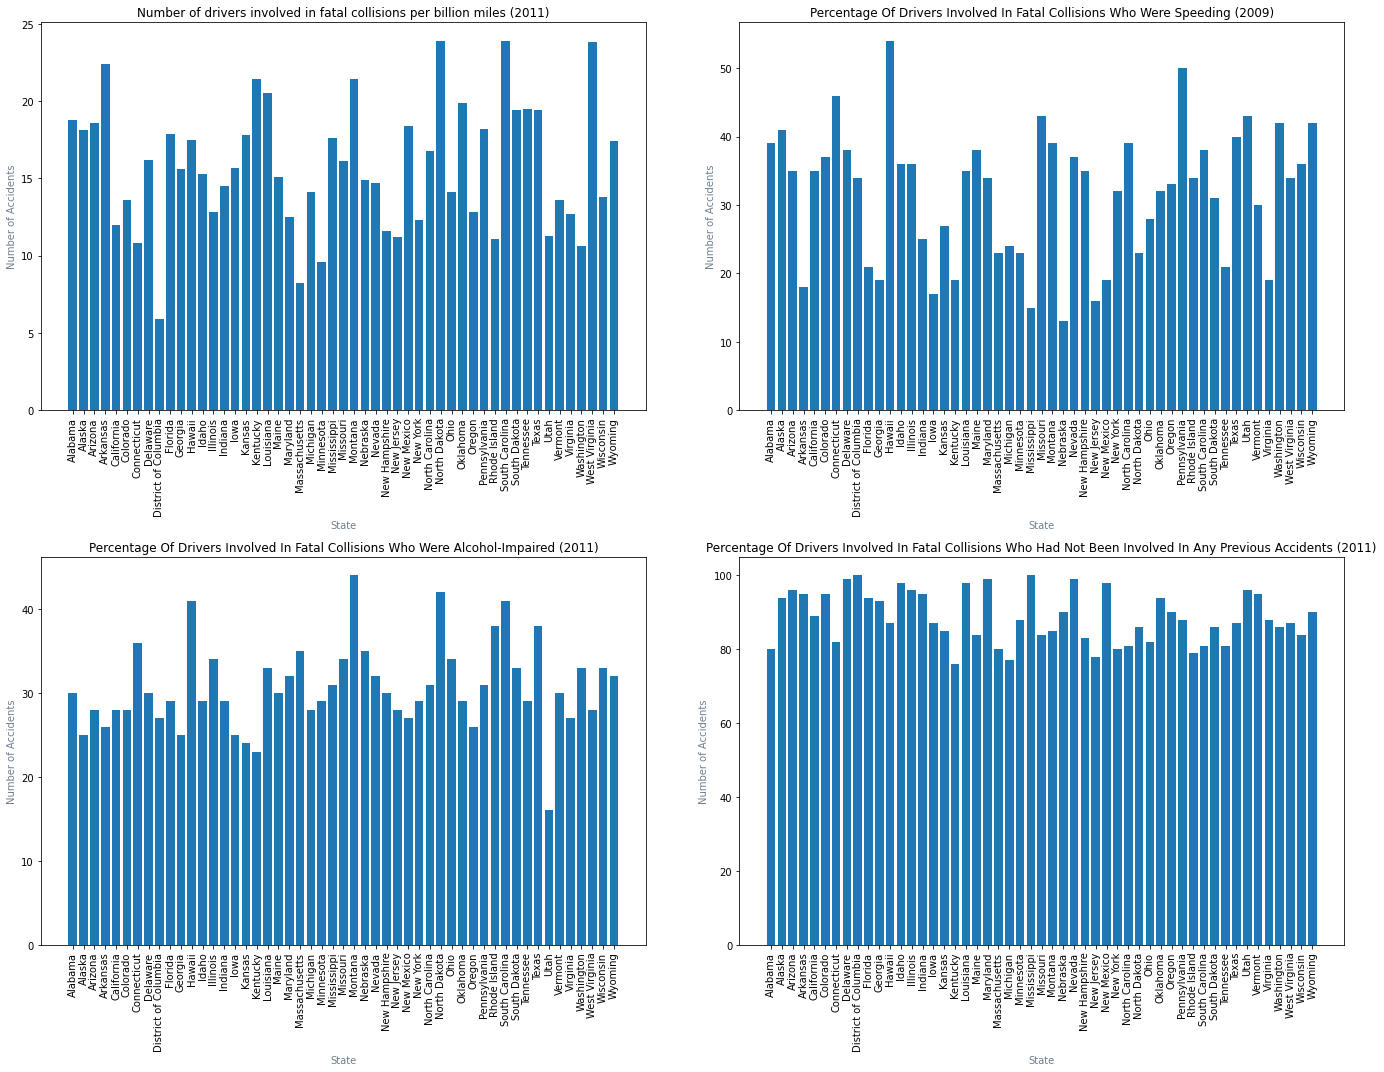

In [ ]:
x = road_accidents['state']
y1 = road_accidents["drvr_fatl_col_bmiles"]
y2 = road_accidents["perc_fatl_speed"]
y3 = road_accidents["perc_fatl_alcohol"]
y4 = road_accidents["perc_fatl_1st_time"]

fig, ax = plt.subplots(2, 2)
fig.set_figwidth(20)
fig.set_figheight(15)

ax[0, 0].bar(x, y1)
ax[0, 0].set_xticklabels(x, rotation=90)
ax[0, 0].set_title('Number of drivers involved in fatal collisions per billion miles (2011)')

ax[0, 1].bar(x, y2)
ax[0, 1].set_xticklabels(x, rotation=90)
ax[0, 1].set_title('Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)')

ax[1, 0].bar(x, y3)
ax[1, 0].set_xticklabels(x, rotation=90)
ax[1, 0].set_title('Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)')

ax[1, 1].bar(x, y4)
ax[1, 1].set_xticklabels(x, rotation=90)
ax[1, 1].set_title('Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)')

for x in ax.flat:
    x.set(xlabel='State', ylabel='Number of Accidents')
    x.xaxis.label.set_color('slategray')
    x.yaxis.label.set_color('slategray')

fig.tight_layout()
plt.show()

**Graphical Visualization of "miles-driven.csv"**

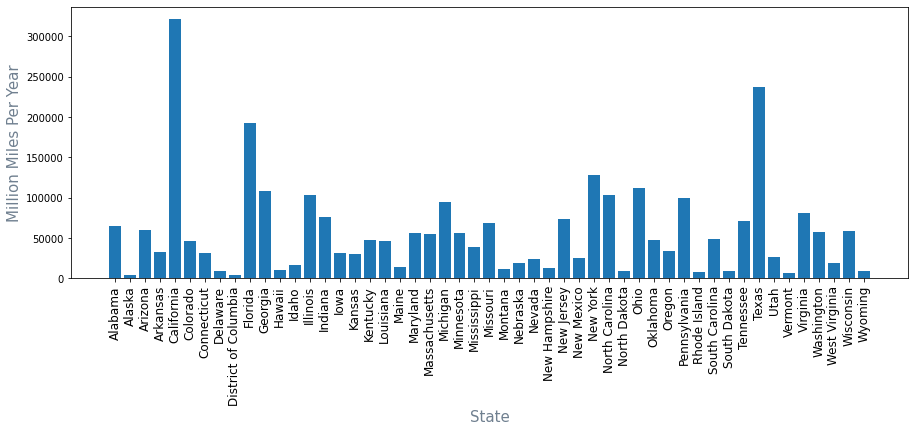

In [ ]:
fig, ax = plt.subplots()
ax.bar(miles_driven['state'], miles_driven["million_miles_annually"])
ax.set_xticklabels(miles_driven['state'], rotation=90)
plt.tick_params(axis='x', which='major', labelsize=12)
plt.xlabel('State', fontsize=15)
plt.ylabel('Million Miles Per Year', fontsize=15)
ax.xaxis.label.set_color('slategray')
ax.yaxis.label.set_color('slategray')
fig.set_figwidth(15)
fig.set_figheight(5)
plt.show()

**Pearson correlation coefficient**

In [ ]:
print('0.2 = weak\n'
'0.5 = medium\n'
'0.8 = strong\n'
'0.9 = very strong\n')
pearsoncorr_road = road_accidents.corr(method = 'pearson')
pearsoncorr_road

0.2 = weak
0.5 = medium
0.8 = strong
0.9 = very strong



,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


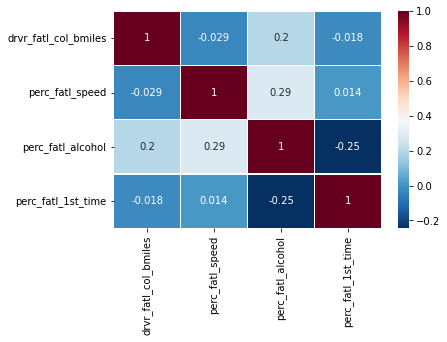

In [ ]:
sns.heatmap(pearsoncorr_road, 
            xticklabels=pearsoncorr_road.columns,
            yticklabels=pearsoncorr_road.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

**Developing a multivariate linear regression model**

In [ ]:
X = road_accidents[['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']]
y = road_accidents['drvr_fatl_col_bmiles']

#splitting data into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(51, 3) (40, 3) (11, 3)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


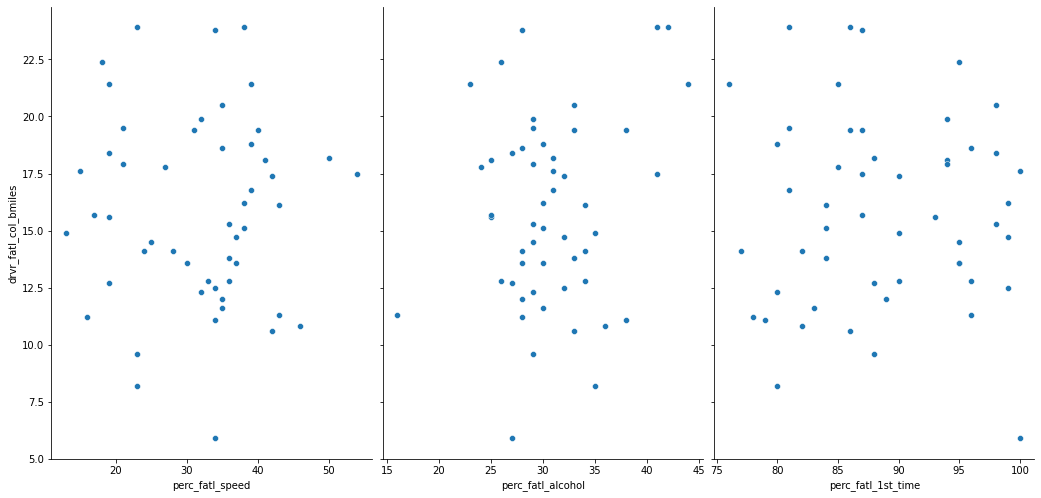

In [ ]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(road_accidents, x_vars=X_train.columns, y_vars='drvr_fatl_col_bmiles', size=7, aspect=0.7)

**Multliple Linear Regression Model**

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X,y)
prediction = linear_regression.predict(X)

In [ ]:
# print the coefficients
print('Intercept:',linear_regression.intercept_)
print('Coefficients:',linear_regression.coef_)

Intercept: 9.064980483403303
Coefficients: [-0.04180041  0.19086404  0.02473301]


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


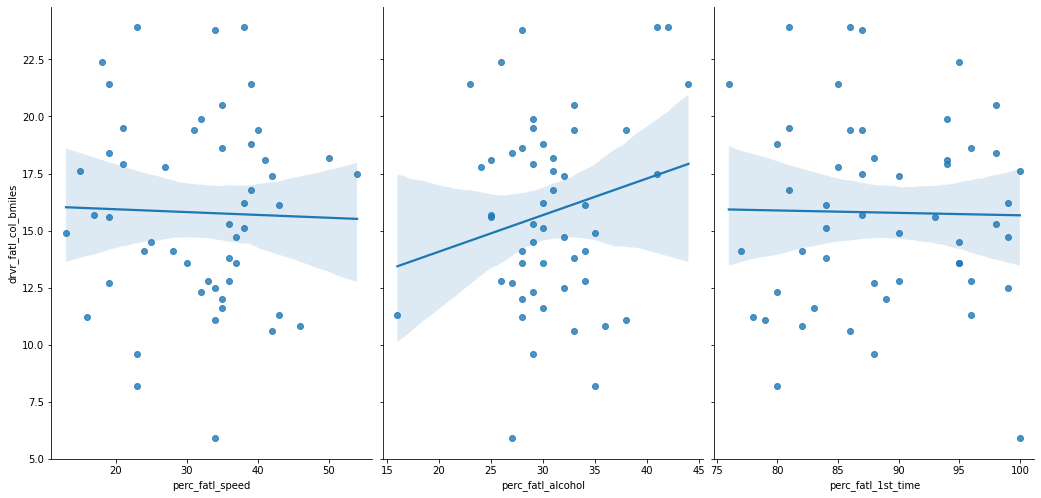

In [ ]:
sns.pairplot(road_accidents, x_vars=X_train.columns, y_vars='drvr_fatl_col_bmiles', size=7, aspect=0.7, kind='reg')

**PCA on standardized data**

The cumulative variance of the first two principal components is 0.7947


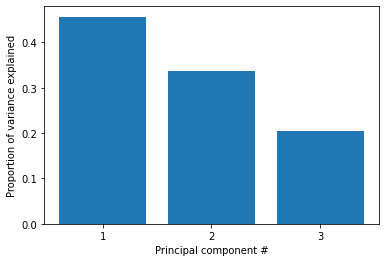

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(features_scaled)

plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[1]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

**Visualize the first two principal components**

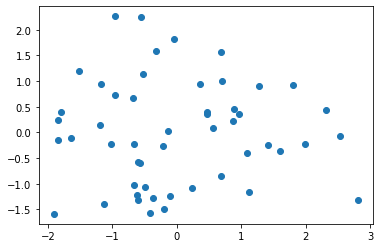

In [ ]:
pca = PCA(n_components=2)
p_comps = pca.fit_transform(features_scaled)
p_comp1 = p_comps[:,0]
p_comp2 = p_comps[:,1]
plt.scatter(p_comp1,p_comp2)
plt.show()

**Clusters of similar states in the data**

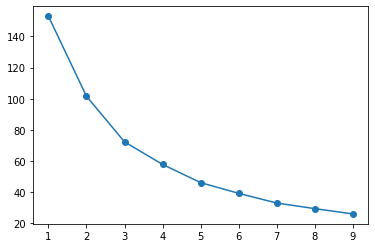

In [ ]:
ks = range(1, 10)
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=8)
    km.fit(features_scaled)
    inertias.append(km.inertia_)
plt.plot(ks, inertias, marker='o')

**KMeans to visualize clusters in the PCA scatter plot**

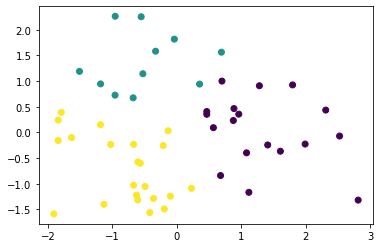

In [ ]:
km = KMeans(n_clusters=3,random_state=8)
km.fit(features_scaled)
plt.scatter(p_comps[:,0],p_comps[:,1],c=km.labels_)

**Visualize the feature differences between the clusters**

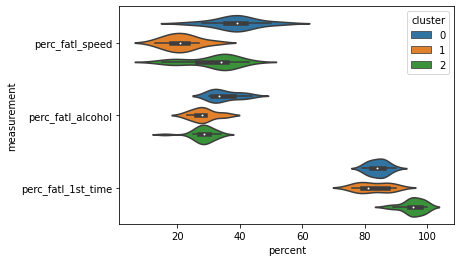

In [ ]:
road_accidents['cluster'] = km.labels_
cols = ['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']
car_melt = pd.melt(road_accidents, id_vars='cluster',var_name="measurement",value_name="percent", value_vars= cols )
sns.violinplot(data=car_melt,y='measurement',x='percent',hue='cluster')

**Compute the number of accidents within each cluster**

,count,mean,sum
cluster,,,
0,18,911.406439,16405.3159
1,11,860.505945,9465.5654
2,22,898.378595,19764.3291


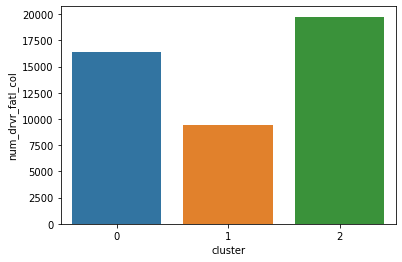

In [ ]:
road_accidents_miles = road_accidents.merge(miles_driven,on="state")
road_accidents_miles['num_drvr_fatl_col'] = (road_accidents_miles['million_miles_annually']*road_accidents_miles['drvr_fatl_col_bmiles'])/1000
sns.barplot(x='cluster', y='num_drvr_fatl_col', data=road_accidents_miles, estimator=sum, ci=None)
count_mean_sum = road_accidents_miles.groupby('cluster')['num_drvr_fatl_col'].agg(['count', 'mean', 'sum'])
count_mean_sum

**Make a decision when there is no clear right choice**

In [ ]:
# Which cluster do you think should be a focus for policy intervention and further investigation?
# cluster_num = 2
# I'd choose cluster# 2 to further investigate since it has the largest number of fatalities.